Polyfit on the bike sharing dataset
---

Solution: Load the dataset
---

> **Exercise**: Create the x/y **Numpy arrays**. The feature vector x should contain the temperature values. The target vector y should contain the number of users.

In [5]:
import pandas as pd
import os

# Load the data into a Pandas DataFrame
data_df = pd.read_csv("c3_bike-sharing.csv")

# Extract the x/y Numpy arrays
x = data_df.temp.values
y = data_df.users.values

print("x:", type(x), x.shape, x.dtype, x[:5])
print("y:", type(y), y.shape, y.dtype, y[:5])

x: <class 'numpy.ndarray'> (302,) float64 [0.1964 0.2    0.227  0.2043 0.1508]
y: <class 'numpy.ndarray'> (302,) int64 [120 108  82  88  41]


Solution: Fit a polynomial
---

> **Exercise**: (A) Fit a polynomial using the Numpy `polyfit()` function. You should test different degrees. (B) Print the optimal coefficients. (C) Plot the polynomial.

Coefficients: [-8918.34020762 10259.76298372 -1491.58834515    56.90113664]


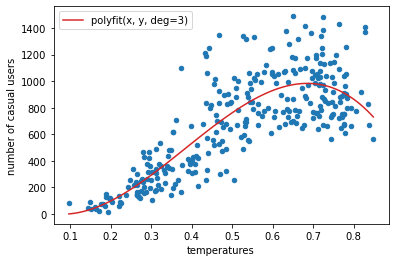

In [6]:
import numpy as np

# (A) Fit a polynomial
coefs = np.polyfit(x, y, deg=3)

# (B) Print coefficients
print("Coefficients:", coefs)

# (C) Plot the polynomial
# Generate a hundred data points between min(x) and max(x)
x_values = np.linspace(min(x), max(x), num=100)

# Compute predictions for these sample data points
y_values = np.polyval(coefs, x_values)

# Plot the polynomial
%matplotlib inline
import matplotlib.pyplot as plt

plt.scatter(x, y, s=20, label=None)
plt.plot(x_values, y_values, c="C3", label="polyfit(x, y, deg=3)")
plt.xlabel("temperatures")
plt.ylabel("number of casual users")
plt.legend()
plt.show()

Solution: Evaluate your model
---

The RSS measure depends on the total number of data points since we sum the squared error over all data points. In practice, we prefer to have a measure that is independent of the number of observations. To achieve this, we can replace the sum by a mean, and we obtain the Mean Squared Error (MSE) measure.

$$
\text{MSE}=\frac{1}{n}\sum_{i=1}^{n}\left(y_{i}-\hat{y}_{i}\right)^{2}
$$

> **Exercise**: Implement the MSE measure.

In [7]:
def MSE(y, y_pred):
    return np.mean(np.square(y - y_pred))

MSE can still be a large number since we measure squared errors. One solution is to take the square root of MSE to obtain the Root Mean Squared Error (RMSE).

$$
\text{RMSE}=\sqrt{\text{MSE}}
$$

> **Exercise**: Compute the estimated values `y_pred` for the data points `x`. Print the RMSE score.

In [8]:
# Compute predictions
y_pred = np.polyval(coefs, x)

# Print RMSE score
print("RMSE score:", np.sqrt(MSE(y, y_pred)))

RMSE score: 207.95941528716375
